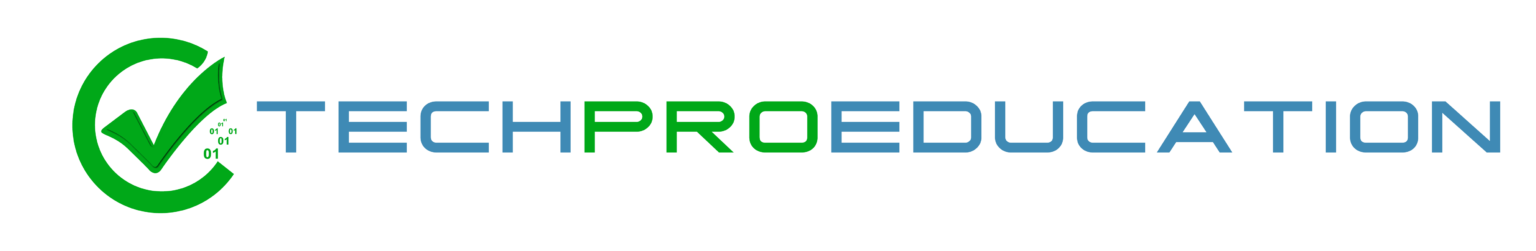

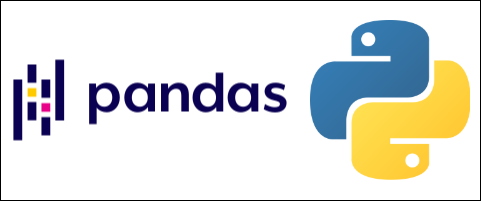

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Combining DataFrames (DataFrame Birlestirme)

**Difference between merge, join, and concatenate;**

[Source01](https://realpython.com/pandas-merge-join-and-concat/), 
[Source02](https://studymachinelearning.com/difference-between-merge-join-and-concatenate/abs), 
[Source03](https://www.educba.com/pandas-merge-vs-join/),
[Source04](https://pandas.pydata.org/docs/user_guide/merging.html), 
[Source05](https://stackoverflow.com/questions/38256104/differences-between-merge-and-concat-in-pandas)

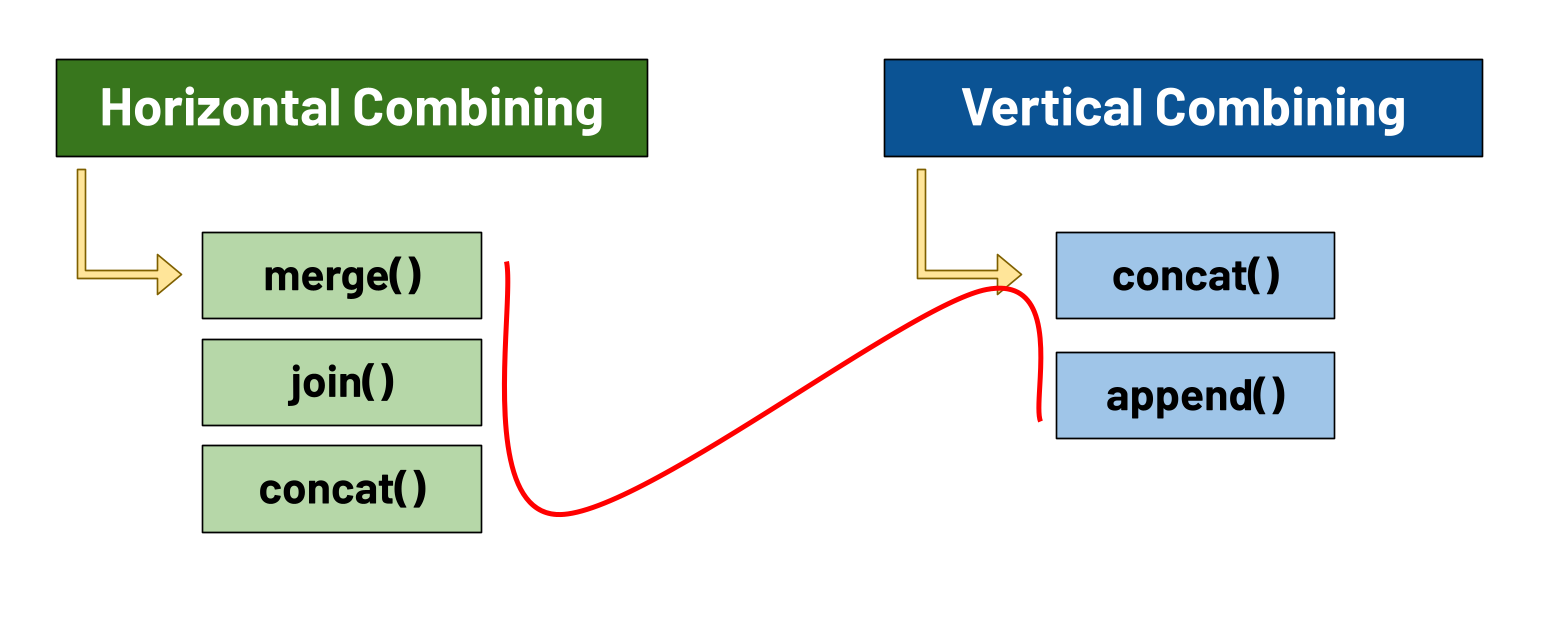

In [2]:
one = pd.DataFrame({
   'name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5'],
   'marks_scored':[98,90,87,69,78]},
   index=[1,2,3,4,5])
two = pd.DataFrame({
   'name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5'],
   'marks_scored':[89,80,79,97,88]},
      index=[1,2,3,4,5])

## append()

append() fonksiyonu, iki veri kümesini birleştirmek için kullanılan en temel yöntemdir.

[Source 01](https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.DataFrame.append.html), 
[Source 02](https://www.geeksforgeeks.org/python-pandas-dataframe-append/), 
[Source 03](https://www.skytowner.com/explore/pandas_dataframe_append_method)

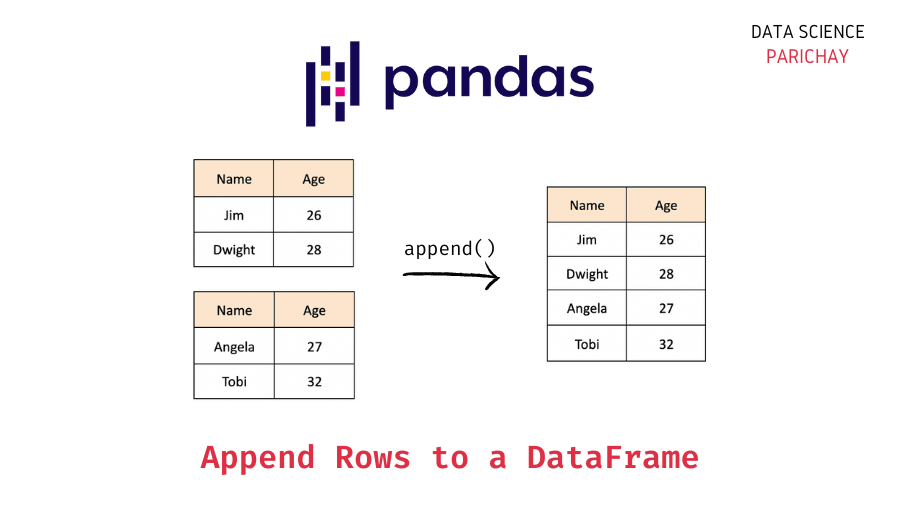

In [3]:
one

,name,subject_id,marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub4,87
4,Alice,sub6,69
5,Ayoung,sub5,78


In [4]:
two

,name,subject_id,marks_scored
1,Billy,sub2,89
2,Brian,sub4,80
3,Bran,sub3,79
4,Bryce,sub6,97
5,Betty,sub5,88


In [5]:
one.append(two) 
# oldugu gibi iki df i birlestiriyor

,name,subject_id,marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub4,87
4,Alice,sub6,69
5,Ayoung,sub5,78
1,Billy,sub2,89
2,Brian,sub4,80
3,Bran,sub3,79
4,Bryce,sub6,97
5,Betty,sub5,88


In [10]:
one.append(two, ignore_index=True)
# ignore_index=True eski indexleri yoksayip 0 dan baslayarak yeniden indexledi

,name,subject_id,marks_scored
0,Alex,sub1,98
1,Amy,sub2,90
2,Allen,sub4,87
3,Alice,sub6,69
4,Ayoung,sub5,78
5,Billy,sub2,89
6,Brian,sub4,80
7,Bran,sub3,79
8,Bryce,sub6,97
9,Betty,sub5,88


## concat()

concat(), iki veya daha fazla DataFrame'i satırlar veya sütunlar bazında birleştirmek için kullanılır.

Farklı veri kümelerini aynı veri kümesinde bir araya getirmek veya veri kümesine yeni sütunlar veya satırlar eklemek için kullanılabilir.

Veri kümeleri arasında herhangi bir ortak sütun gerekmez.

[Source 01](https://pandas.pydata.org/docs/reference/api/pandas.concat.html), 
[Source 02](https://sparkbyexamples.com/pandas/pandas-concat-dataframes-explained/), 
[Source 03](https://practicaldatascience.co.uk/data-science/how-to-use-pandas-concat-to-concatenate-dataframes) & 
[Source 04](https://www.tutorialspoint.com/python_pandas/python_pandas_concatenation.htm)

In [11]:
pd.concat([one,two]) # koseli parantez gerekli


,name,subject_id,marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub4,87
4,Alice,sub6,69
5,Ayoung,sub5,78
1,Billy,sub2,89
2,Brian,sub4,80
3,Bran,sub3,79
4,Bryce,sub6,97
5,Betty,sub5,88


In [12]:
pd.concat([one,two],ignore_index=True)

,name,subject_id,marks_scored
0,Alex,sub1,98
1,Amy,sub2,90
2,Allen,sub4,87
3,Alice,sub6,69
4,Ayoung,sub5,78
5,Billy,sub2,89
6,Brian,sub4,80
7,Bran,sub3,79
8,Bryce,sub6,97
9,Betty,sub5,88


In [13]:
pd.concat([one,two],ignore_index=True, axis = 1) 
# axis =1 horizantel birlestiriyor
# concat in append() den bir farki axis parametresi olmasi

,0,1,2,3,4,5
1,Alex,sub1,98,Billy,sub2,89
2,Amy,sub2,90,Brian,sub4,80
3,Allen,sub4,87,Bran,sub3,79
4,Alice,sub6,69,Bryce,sub6,97
5,Ayoung,sub5,78,Betty,sub5,88


In [14]:
# iki df nin istedugumiz atir ve sutunlari birlestirmek istersek
pd.concat([one.iloc[:,:2],two.iloc[:,1:]])
# one df den tums atirlari 0.ve 1.indexteki sutunlari, two df den tum satirlari 2.index ve sonraki sutunlari birlestir
# burada cagirdigimiz satirlarda o sutundaki veri yoksa NaN gelir

,name,subject_id,marks_scored
1,Alex,sub1,NaN
2,Amy,sub2,NaN
3,Allen,sub4,NaN
4,Alice,sub6,NaN
5,Ayoung,sub5,NaN
1,NaN,sub2,89.0
2,NaN,sub4,80.0
3,NaN,sub3,79.0
4,NaN,sub6,97.0
5,NaN,sub5,88.0


In [15]:
pd.concat([one.iloc[:,:2],two.iloc[:,1:]], axis=1)

,name,subject_id,subject_id,marks_scored
1,Alex,sub1,sub2,89
2,Amy,sub2,sub4,80
3,Allen,sub4,sub3,79
4,Alice,sub6,sub6,97
5,Ayoung,sub5,sub5,88


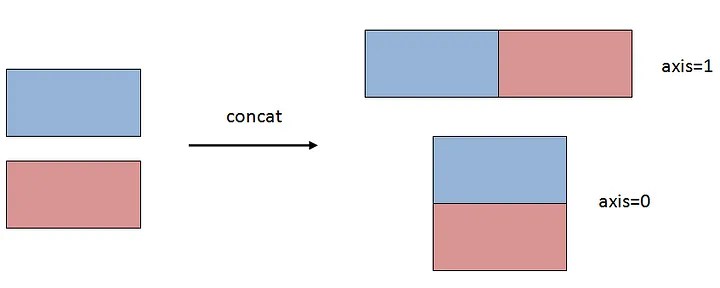

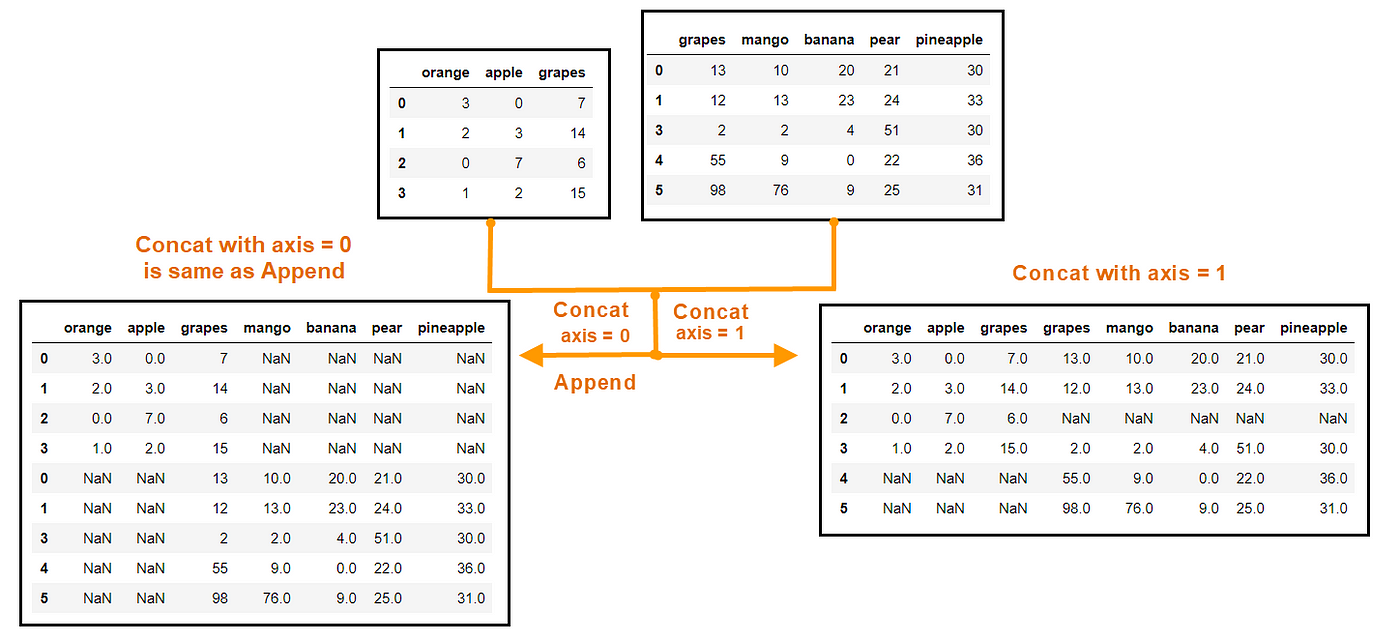

## merge()

merge(), iki veya daha fazla veri kümesini, ortak bir sütuna göre birleştirme işlemidir. 

Ortak sütunlardaki değerlere göre veriler birleştirilir ve tek bir veri kümesi oluşturulur. 

merge(), veri kümesindeki eksik veya farklı değerleri tamamlamak veya farklı veri kaynaklarını bir araya getirmek için sıkça kullanılır.

[Source 01](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html), 
[Source 02](https://www.w3schools.com/python/pandas/ref_df_merge.asp), 
[Source 03](https://www.digitalocean.com/community/tutorials/pandas-merge-two-dataframe),
[Source 04](https://towardsdatascience.com/why-and-how-to-use-merge-with-pandas-in-python-548600f7e738)

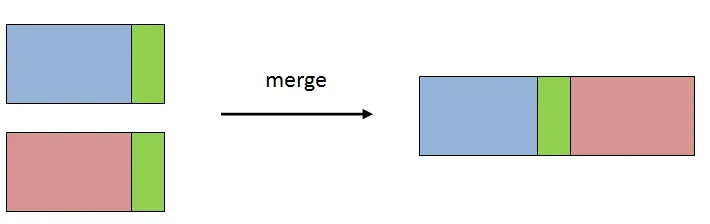

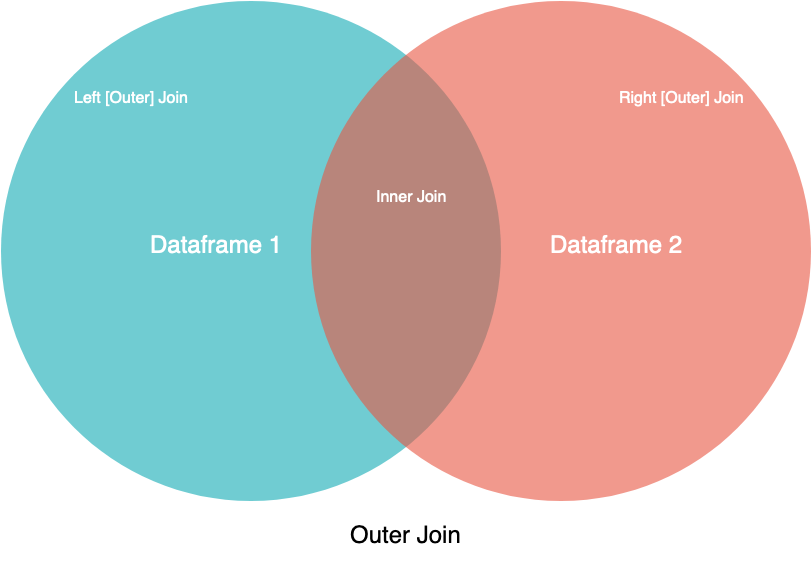

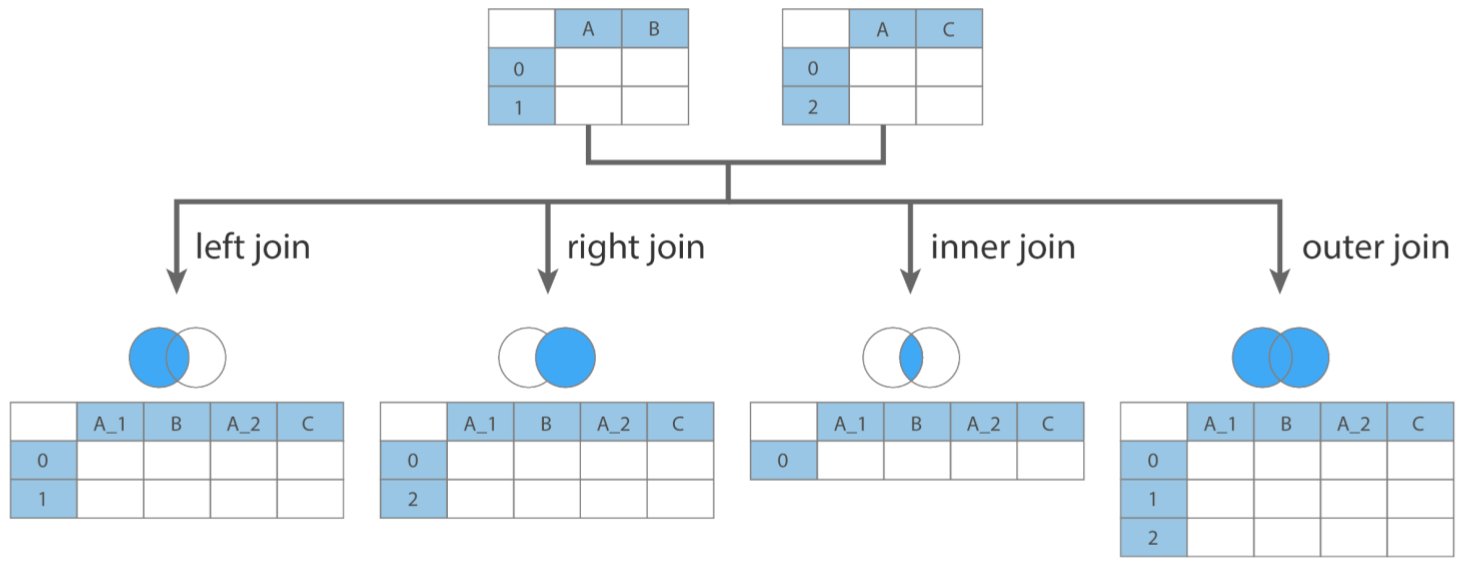

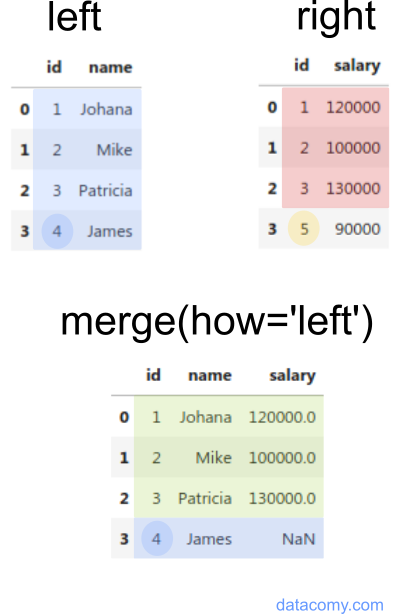

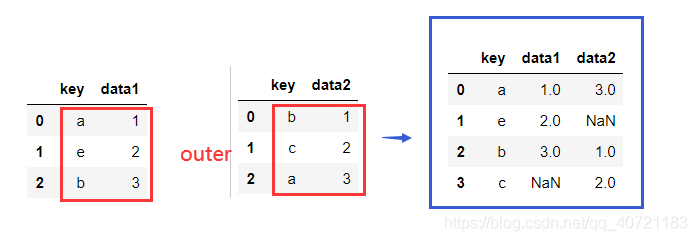

In [16]:
x = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                     'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']})
y = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

In [17]:
x

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


In [18]:
y

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [21]:
pd.merge(x, y , how="inner", on = "key") # on = key ortak sutunu belirtik (primary key)
# how="  " parametresei bize nasil birlestirecegimizi belirtir. default how="inner" dir
# how="inner" kullandigimiz icin sadece ortak satirlari aldi

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [25]:
pd.merge(x, y , how="outer")
# how="outer" kullandigimiz icin tum satirlari getirdi diger tabloda verisi olmayan satirdaki hucrelere NaN yerlestirdi

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,NaN,NaN,C3,D3


In [26]:
pd.merge(x, y , how="right")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,NaN,NaN,C3,D3


In [27]:
pd.merge(x, y , how="left")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [28]:
df1 = pd.DataFrame({'lkey': ['x', 'y', 'z', 'x'],
                    'lvalue': [2, 3, 5, 7]})
df2 = pd.DataFrame({'rkey': ['a', 'x', 'z', 'b'],
                    'rvalue': [7, 8, 9, 10]})

In [29]:
df1

,lkey,lvalue
0,x,2
1,y,3
2,z,5
3,x,7


In [30]:
df2

,rkey,rvalue
0,a,7
1,x,8
2,z,9
3,b,10


In [31]:
pd.merge(df1,df2, left_on= "lkey", right_on="rkey", how="inner")
# df1 i once yazdigimiz icin left_on= a once df1 in sutununu yaziyoruz sonra ikincininkini
# left_on= "birincisutunadi" ve right_on="ikincisutunadi" baglanti kuracagimiz sutunlari belirtir
# sütün isimleri farklı olduğu yani tam anlamıyla ortak bir sutun yer almadığı için lefton raight on yapıyoruz ve bir ortak tanımlıyruz
# burada sadece x ve z satirlari ortak oldugu icin bu satirlari getirdi sadece

,lkey,lvalue,rkey,rvalue
0,x,2,x,8
1,x,7,x,8
2,z,5,z,9


In [32]:
pd.merge(df1,df2, left_on= "lkey", right_on="rkey", how="outer")
# how="outer" tum satirlari getirdi diger tabloda olmayan veriler yerine NaN yaziyor

,lkey,lvalue,rkey,rvalue
0,x,2.0,x,8.0
1,x,7.0,x,8.0
2,y,3.0,NaN,NaN
3,z,5.0,z,9.0
4,NaN,NaN,a,7.0
5,NaN,NaN,b,10.0


## join()

join(), iki veya daha fazla DataFrame'i belirli bir sütuna göre birleştirme işlemidir.

Daha çok SQL tabanlı veri işleme işlemlerinde kullanılır. 

[Source 01](https://sparkbyexamples.com/pandas/pandas-join-explained-with-examples/), 
[Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html), 
[Source 03](https://www.w3schools.com/python/pandas/ref_df_join.asp)

In [34]:
pd.merge(df1, df2, left_on="lkey", right_on="rkey", how="outer")

df3 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index = ['K0', 'K1', 'K2'])
df4 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index = ['K0', 'K2', 'K3'])

In [35]:
df3

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [36]:
df4

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [37]:
df3.join(df4)
# join() icinde how="" parametresi default olarak how="left" tir.

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [38]:
df3.join(df4, how="right")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [39]:
df3.join(df4, how="outer")
# outer,left,rigth da NaN deger gorebiliriz ama inner da NaN olmaz

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [41]:
df4.join(df3)

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


In [42]:
df5 = pd.DataFrame({'key': ['K0', 'K2', 'K3', 'K4', 'K5', 'K6'],
                   'X': ['X0', 'X2', 'X3', 'X4', 'X5', 'X6']})
df6 = pd.DataFrame({'key': ['K0', 'K2', 'K3'],
                      'Y': ['Y0', 'Y2', 'Y3']})

In [43]:
df5

,key,X
0,K0,X0
1,K2,X2
2,K3,X3
3,K4,X4
4,K5,X5
5,K6,X6


In [44]:
df6

,key,Y
0,K0,Y0
1,K2,Y2
2,K3,Y3


In [46]:
# df5.join(df6) # iki table da ortak sutun isimleri oldugu icin bu sekilde kullanamadik
# bu yuzden asagidaki gibi ortak isimden sonrasina isimleri farkli yapmak icin ek isimler ekledik
df5.join(df6, lsuffix="_left", rsuffix="_right")

,key_left,X,key_right,Y
0,K0,X0,K0,Y0
1,K2,X2,K2,Y2
2,K3,X3,K3,Y3
3,K4,X4,NaN,NaN
4,K5,X5,NaN,NaN
5,K6,X6,NaN,NaN


In [ ]:
df5.set_index("key") # set_index("key") ile df5 in key sutununu index sutunu yapti, kalici atamadi

In [ ]:
df6.set_index("key") # set_index("key") ile df6 in key sutununu index sutunu yapti, kalici atamadi

In [48]:
df5.set_index("key").join(df6.set_index("key"))
# bu sekilde df5 in ve df6 nin ayni isimde olan sutunlarini index sutunu yaparak degistirmis olduk ve hatayi onledik

,X,Y
key,,
K0,X0,Y0
K2,X2,Y2
K3,X3,Y3
K4,X4,NaN
K5,X5,NaN
K6,X6,NaN


# Text Data - String Methods

**str.lower():** Bir stringi küçük harfe dönüştürür

**str.upper():** Bir stringi büyük harfe dönüştürür

**str.capitalize():** İlk karakteri büyük harfe dönüştürür

**str.title():** Her kelimenin ilk karakterini büyük harfe dönüştürür

**str.swapcase():** Büyük harfleri küçük, küçük harfleri büyük harfe dönüştürür

**str.isalpha():** Tüm karakterlerin alfabede yer alıp almadığını kontrol ederek True veya False değeri döndürür

**str.isnumeric():** Tüm karakterlerin sayısal değer içerip içermediğini kontrol ederek True veya False değeri döndürür

**str.isalnum():** Tüm karakterlerin harf veya sayısal değer içerip içermediğini kontrol ederek True veya False değeri döndürür

**str.endswith():** Bir stringin belirtilen değerle bittiğini kontrol ederek True veya False değeri döndürür

**str.startswith():** Bir stringin belirtilen değerle başladığını kontrol ederek True veya False değeri döndürür

**str.contains():** Bir alt dizinin bir dizede bulunup bulunmadığını kontrol ederek her bir öğe için True veya False değeri döndürür

**str.strip():** Bir stringin başındaki ve sonundaki boşlukları temizler ve kırpılmış bir versiyonunu döndürür

**str.replace():** Belirtilen bir değeri başka bir değerle değiştirilmiş bir string döndürür

**str.split():** Bir stringi belirtilen ayraçta böler ve bir liste döndürür

**str.find():** Bir stringde belirtilen bir değeri arar ve bulunduğu konumun indeksini döndürür

**str.findall():** Bir desendeki tüm örneklerin bir listesini döndürür

**str.join():** Bir iterable ın öğelerini bir stringe dönüştürür

[SOURCE01](https://docs.python.org/3/library/stdtypes.html#string-methods),
[SOURCE02](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html),
[SOURCE03](https://www.aboutdatablog.com/post/10-most-useful-string-functions-in-pandas),
[SOURCE04](https://www.tutorialspoint.com/python_pandas/python_pandas_working_with_text_data.htm) &
[Video](https://www.youtube.com/watch?v=6JNwK6hEneg)

In [49]:
df = pd.DataFrame(data=[['Tyler DURDEN', 'HR', "manager", "$180,000", 55],
                        ['MARIA puder', "IT", "data analyst", "150000dolar", 28],
                        ['dorothy gale', "HR", "recruiter", "$120,000", 30],
                        ['Edmond Dantes', "IT", "data scientist", "$170,000","-"],
                        ['Gregor SAMSA',"IT", "frontend developer", "120000dolar",32]],
                  columns=["name","dept", "job", "sales", "age"])

In [50]:
df

,name,dept,job,sales,age
0,Tyler DURDEN,HR,manager,"$180,000",55
1,MARIA puder,IT,data analyst,150000dolar,28
2,dorothy gale,HR,recruiter,"$120,000",30
3,Edmond Dantes,IT,data scientist,"$170,000",-
4,Gregor SAMSA,IT,frontend developer,120000dolar,32


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5 non-null      object
 1   dept    5 non-null      object
 2   job     5 non-null      object
 3   sales   5 non-null      object
 4   age     5 non-null      object
dtypes: object(5)
memory usage: 328.0+ bytes


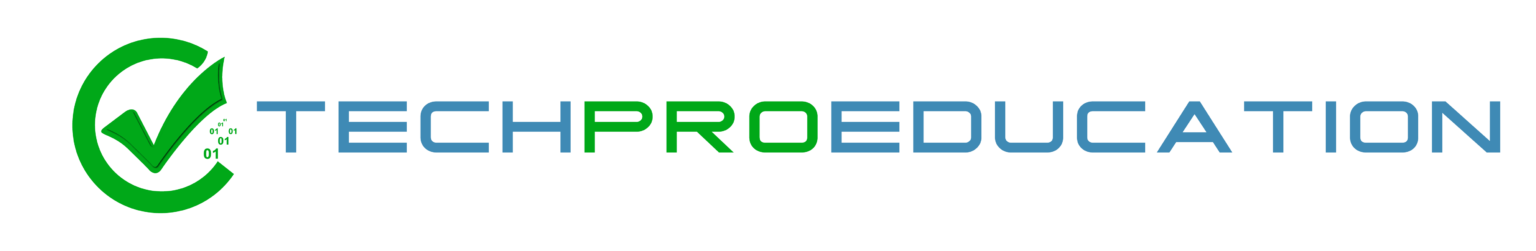